# Análise de Dados do Cinema Brasileiro

Analisando dados de bilheterias nacionais e salas de exibição

Questões a serem respondidadas:
1. Quantas salas de cinema existem no Brasil atualmente?
2. Houve crescimento das salas de cinema?
3. As pessoas tem ido menos ao cinema?
3. Qual o filme com maior público em bilheteria no país?
4. Qual o filme nacional com maior público em bilheteria?

Fonte: https://dados.gov.br/dados/organizacoes/visualizar/agencia-nacional-do-cinema

## Analisando Salas de Cinema

In [1]:
# importando pacotes

import zipfile as zip
import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import polars as pl

path = 'D:\\Desktop\\DataScience\\Python\\Projects\\analise_dados_cinemabr\\dados'

## Salas de Cinema

In [2]:
url_salas = 'https://dados.ancine.gov.br/dados-abertos/salas-de-exibicao-e-complexos.csv'
url_salas2 = 'https://dados.ancine.gov.br/dados-abertos/salas-de-exibicao-evolucao-anual.csv'

response = wget.download(url_salas, path + '/salas-de-exibicao-e-complexos.csv')

df_salas = pd.read_csv(response, sep=';')

df_salas.head()

,NOME_SALA,REGISTRO_SALA,CNPJ_SALA,SITUACAO_SALA,DATA_SITUACAO_SALA,DATA_INICIO_FUNCIONAMENTO_SALA,ASSENTOS_SALA,ASSENTOS_CADEIRANTES,ASSENTOS_MOBILIDADE_REDUZIDA,ASSENTOS_OBESIDADE,...,MUNICIPIO_COMPLEXO,CEP_COMPLEXO,UF_COMPLEXO,COMPLEXO_ITINERANTE,OPERACAO_USUAL,NOME_EXIBIDOR,REGISTRO_EXIBIDOR,CNPJ_EXIBIDOR,SITUACAO_EXIBIDOR,NOME_GRUPO_EXIBIDOR
0,CINE COMPANY JAGUARIUNA,5003332.0,10.615.866/0001-60,FECHADO,29/08/2011,16/12/2008,162.0,NaN,NaN,NaN,...,JAGUARIÚNA,13820-000,SP,NÃO,COMERCIAL,02 P D & ARAUJO EMPRESA CINEMATOGRAFICA LTDA,19954,10.615.866/0001-60,IRREGULAR,NÃO PERTENCE A NENHUM GRUPO EXIBIDOR
1,CINE COMPANY JAGUARIUNA SALA 01,5003331.0,10.615.866/0001-60,FECHADO,29/08/2011,16/12/2008,162.0,NaN,NaN,NaN,...,JAGUARIÚNA,13820-000,SP,NÃO,COMERCIAL,02 P D & ARAUJO EMPRESA CINEMATOGRAFICA LTDA,19954,10.615.866/0001-60,IRREGULAR,NÃO PERTENCE A NENHUM GRUPO EXIBIDOR
2,PARK SHOPPING 01,5003401.0,00.779.721/0054-53,EM FUNCIONAMENTO,24/04/2021,18/11/2011,402.0,8.0,5.0,5.0,...,SÃO CAETANO DO SUL,09531-190,SP,NÃO,COMERCIAL,CINEMARK BRASIL S.A,1843,00.779.721/0001-41,REGULAR,CINEMARK
3,PARK SHOPPING 02,5003402.0,00.779.721/0054-53,EM FUNCIONAMENTO,24/04/2021,18/11/2011,370.0,8.0,4.0,4.0,...,SÃO CAETANO DO SUL,09531-190,SP,NÃO,COMERCIAL,CINEMARK BRASIL S.A,1843,00.779.721/0001-41,REGULAR,CINEMARK
4,PARK SHOPPING 03,5003403.0,00.779.721/0054-53,EM FUNCIONAMENTO,24/04/2021,18/11/2011,245.0,5.0,3.0,3.0,...,SÃO CAETANO DO SUL,09531-190,SP,NÃO,COMERCIAL,CINEMARK BRASIL S.A,1843,00.779.721/0001-41,REGULAR,CINEMARK


In [3]:
df_salas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NOME_SALA                       6300 non-null   object 
 1   REGISTRO_SALA                   6300 non-null   float64
 2   CNPJ_SALA                       6336 non-null   object 
 3   SITUACAO_SALA                   6336 non-null   object 
 4   DATA_SITUACAO_SALA              6300 non-null   object 
 5   DATA_INICIO_FUNCIONAMENTO_SALA  6282 non-null   object 
 6   ASSENTOS_SALA                   6300 non-null   float64
 7   ASSENTOS_CADEIRANTES            5094 non-null   float64
 8   ASSENTOS_MOBILIDADE_REDUZIDA    4363 non-null   float64
 9   ASSENTOS_OBESIDADE              4497 non-null   float64
 10  ACESSO_ASSENTOS_COM_RAMPA       6336 non-null   object 
 11  ACESSO_SALA_COM_RAMPA           6336 non-null   object 
 12  BANHEIROS_ACESSIVEIS            63

In [5]:
df_filtrado = df_salas[df_salas['SITUACAO_SALA'] == 'EM FUNCIONAMENTO']

salas = df_filtrado['NOME_SALA'].nunique()
cinemas = df_filtrado['NOME_COMPLEXO'].nunique()

print(f'Existem {salas:,} salas de cinema em {cinemas:,} complexos em funcionamento no Brasil')

Existem 3,665 salas de cinema em 1,013 complexos em funcionamento no Brasil


In [6]:
# Gráfico de colunas com distribuição de salas e cinemas [funcionando, fechadas, ...]

data = df_salas.groupby('SITUACAO_SALA').agg({'NOME_SALA':['nunique'], 'NOME_COMPLEXO':['nunique']}).reset_index()
data.columns = ['SITUACAO_SALA', 'SALAS', 'COMPLEXOS']
data = data[data['SITUACAO_SALA'] != 'NÃO ENCONTRADA']
data = pd.melt(data, id_vars='SITUACAO_SALA', var_name='TIPO', value_name='VALORES')


fig_1 = px.bar(
    data_frame=data,
    x='TIPO',
    y='VALORES',
    color='SITUACAO_SALA',
    title='Distribuição de Salas de Cinema em funcionamento'
)

fig_1.show()

In [7]:
cinemas_uf = df_filtrado.groupby('UF_COMPLEXO').agg({'NOME_SALA':['nunique'], 'NOME_COMPLEXO':['nunique']}).reset_index()
cinemas_uf.columns = ['UF', 'SALAS', 'CINEMAS']
cinemas_uf['SALA_BY_CINEMA'] = round(cinemas_uf.SALAS / cinemas_uf.CINEMAS, 1)
cinemas_uf = cinemas_uf.sort_values('CINEMAS', ascending=False)

cinemas_uf.head(10)

,UF,SALAS,CINEMAS,SALA_BY_CINEMA
25,SP,1155,295,3.9
18,RJ,408,108,3.8
10,MG,288,93,3.1
17,PR,237,66,3.6
22,RS,193,66,2.9
23,SC,153,48,3.2
4,BA,144,42,3.4
8,GO,124,38,3.3
15,PE,124,32,3.9
5,CE,119,29,4.1


In [8]:
fig = px.bar(
    data_frame=cinemas_uf,
    x='CINEMAS',
    y='UF',
    orientation='h',
    title='Cinemas em funcionamento no Brasil'
)

fig.update_yaxes(autorange="reversed")
fig.show()

In [9]:
response = wget.download(url_salas2, path + '/salas-de-exibicao-evolucao-anual.csv')
df_salas2 = pd.read_csv(response, sep=';')
df_salas2.head()

,ANO,NOME_SALA,REGISTRO_ANCINE,MUNICIPIO,UF,STATUS
0,2014,3 AMÉRICAS 01,5002041,CUIABÁ,MT,FECHADA
1,2014,3 AMÉRICAS 02,5002040,CUIABÁ,MT,FECHADA
2,2014,3 AMÉRICAS 03,5002042,CUIABÁ,MT,FECHADA
3,2014,3 AMÉRICAS 04,5002043,CUIABÁ,MT,FECHADA
4,2014,3 AMÉRICAS 05,5002038,CUIABÁ,MT,FECHADA


In [10]:
df = df_salas2[df_salas2['STATUS']=='ABERTA'].groupby('ANO')['NOME_SALA'].nunique().reset_index()
df.columns = ['ANO', 'QTD_SALAS']

fig = px.bar(
    data_frame=df,
    x='ANO',
    y='QTD_SALAS',
    title='Evolução da salas de cinema no Brasil'
)

fig.show()

## Bilheterias Diárias

In [ ]:
url_bilheteria = 'https://dados.ancine.gov.br/dados-abertos/bilheteria-diaria-obras-por-exibidoras-csv.zip'
# url_bilheteria2 = 'https://dados.ancine.gov.br/dados-abertos/bilheteria-diaria-obras-por-distribuidoras-csv.zip'

response = wget.download(url_bilheteria, path + '/Bilheteria/bilheteria-diaria-obras-por-exibidoras-csv.zip')

with zip.ZipFile(response, 'r') as zObject:
    zObject.extractall(path = dir + '/Bilheteria')

df_bilheteria = pl.scan_csv(dir + '/Bilheteria/*.csv', separator=';').collect()

df_bilheteria = df_bilheteria.with_columns(
    (pl.col('DATA_EXIBICAO').str.to_datetime('%d/%m/%Y')),
    (pl.col('SESSAO').str.to_datetime('%d/%m/%Y %H:%M:%S'))
)

df_bilheteria.write_parquet(path + '/dados_bilheteria.parquet')

In [11]:
cols = ['DATA_EXIBICAO', 'TITULO_ORIGINAL', 'TITULO_BRASIL', 'LEGENDADA', 'PAIS_OBRA',
        'PUBLICO', 'MUNICIPIO_SALA_COMPLEXO', 'UF_SALA_COMPLEXO']

df_bilheteria = pd.read_parquet(path + '/dados_bilheteria.parquet', columns=cols, engine='pyarrow')

df_bilheteria.head()

,DATA_EXIBICAO,TITULO_ORIGINAL,TITULO_BRASIL,LEGENDADA,PAIS_OBRA,PUBLICO,MUNICIPIO_SALA_COMPLEXO,UF_SALA_COMPLEXO
0,2014-06-01,NOAH,NOÉ,SIM,ESTADOS UNIDOS,0,ARAPIRACA,AL
1,2014-06-01,NOAH,NOÉ,SIM,ESTADOS UNIDOS,0,ARAPIRACA,AL
2,2014-06-01,NOAH,NOÉ,SIM,ESTADOS UNIDOS,0,ARAPIRACA,AL
3,2014-06-01,NOAH,NOÉ,SIM,ESTADOS UNIDOS,0,ARAPIRACA,AL
4,2014-06-11,DIVERGENT,DIVERGENTE,SIM,ESTADOS UNIDOS,0,ARAPIRACA,AL


In [12]:
df_bilheteria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886227 entries, 0 to 34886226
Data columns (total 8 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   DATA_EXIBICAO            object
 1   TITULO_ORIGINAL          object
 2   TITULO_BRASIL            object
 3   LEGENDADA                object
 4   PAIS_OBRA                object
 5   PUBLICO                  int64 
 6   MUNICIPIO_SALA_COMPLEXO  object
 7   UF_SALA_COMPLEXO         object
dtypes: int64(1), object(7)
memory usage: 2.1+ GB


In [13]:
df_bilheteria['DATA_EXIBICAO'] = pd.to_datetime(df_bilheteria['DATA_EXIBICAO'])
df_bilheteria['YEAR'] = df_bilheteria['DATA_EXIBICAO'].dt.to_period('Y')
df_bilheteria['YEAR_MONTH'] = df_bilheteria['DATA_EXIBICAO'].dt.to_period('M')

bilheteria_mensal = df_bilheteria.groupby('YEAR_MONTH')['PUBLICO'].sum().reset_index()

bilheteria_mensal = bilheteria_mensal[(bilheteria_mensal['YEAR_MONTH'] >= '2016-01') & (bilheteria_mensal['YEAR_MONTH'] <= '2025-12')]

In [14]:
fig = px.line(
    x=bilheteria_mensal['YEAR_MONTH'].dt.to_timestamp(),
    y=bilheteria_mensal['PUBLICO'])

fig.update_layout(
    xaxis_title='Mês/Ano',
    yaxis_title='Bilheteria (Público)',
)

fig.show()

In [15]:
fig = px.scatter(
    x=bilheteria_mensal['YEAR_MONTH'].dt.to_timestamp(),
    y=bilheteria_mensal['PUBLICO'],
    trendline='ols',
    title='Bilheteria Mensal com Linha de Tendência'
)

fig.add_traces(
    px.line(
        x=bilheteria_mensal['YEAR_MONTH'].dt.to_timestamp(),
        y=bilheteria_mensal['PUBLICO']
    ).data
)

fig.update_layout(
    xaxis_title='Mês/Ano',
    yaxis_title='Bilheteria (Público)',
)

fig.show()

In [16]:
# Top 10 filmes com maior público

top10_filmes = df_bilheteria.groupby('TITULO_BRASIL')['PUBLICO'].sum().reset_index()
top10_filmes = top10_filmes.sort_values('PUBLICO', ascending=False).head(10)
top10_filmes

,TITULO_BRASIL,PUBLICO
1036,DIVERTIDA MENTE 2,22198962
3241,VINGADORES: ULTIMATO,19361828
1441,HOMEM-ARANHA: SEM VOLTA PARA CASA,16643009
2306,O REI LEÃO,16055534
3240,VINGADORES: GUERRA INFINITA,14286806
602,AVATAR: O CAMINHO DA ÁGUA,11639895
635,BARBIE,10709279
1651,LILO & STITCH,10277041
2450,OS INCRÍVEIS 2,9711506
899,CORINGA,9488050


In [17]:
# Top 10 filmes brasileiros com maior público acumulado

top10_brasileiros = df_bilheteria[(df_bilheteria['PAIS_OBRA'] == 'BRASIL') & (df_bilheteria['TITULO_BRASIL'].isna())]
top10_brasileiros = top10_brasileiros.groupby('TITULO_ORIGINAL')['PUBLICO'].sum().reset_index()
top10_brasileiros = top10_brasileiros.sort_values('PUBLICO', ascending=False).head(10)
top10_brasileiros

,TITULO_ORIGINAL,PUBLICO
1248,NADA A PERDER,11418455
1187,MINHA MÃE É UMA PEÇA 3,11376931
1186,MINHA MÃE É UMA PEÇA 2,8793951
188,AINDA ESTOU AQUI,5719762
1188,MINHA VIDA EM MARTE,5283211
1249,NADA A PERDER 2,5257231
1328,O AUTO DA COMPADECIDA 2,4292649
806,"FALA SÉRIO, MÃE!",2989308
1545,OS FAROFEIROS,2600060
1184,MINHA IRMÃ E EU,2288690


In [18]:
# Top 10 filmes com maior publico por ano

top10_filmes_ano = df_bilheteria.groupby(['YEAR', 'TITULO_BRASIL'])['PUBLICO'].sum().reset_index()
top10_filmes_ano[top10_filmes_ano['YEAR'] == '2024'].sort_values('PUBLICO', ascending=False).head(10)

,YEAR,TITULO_BRASIL,PUBLICO
4097,2024,DIVERTIDA MENTE 2,22197172
4218,2024,MOANA 2,7832935
4215,2024,MEU MALVADO FAVORITO 4,7826290
4082,2024,DEADPOOL & WOLVERINE,7380395
3938,2024,A FORJA,2991086
4464,2024,É ASSIM QUE ACABA,2947022
4338,2024,PLANETA DOS MACACOS: O REINADO,2726668
4449,2024,VENOM: A ÚLTIMA RODADA,2564582
4000,2024,AQUAMAN 2: O REINO PERDIDO,2458764
4223,2024,MUFASA: O REI LEÃO,2335851


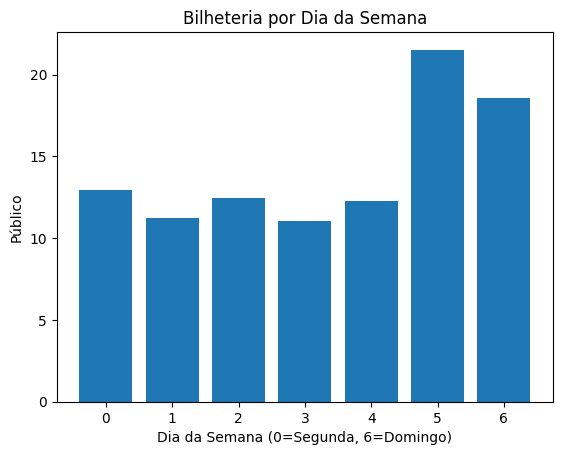

In [19]:
df_bilheteria['DATA_EXIBICAO'] = pd.to_datetime(df_bilheteria['DATA_EXIBICAO'])
df_bilheteria['WEEK_DAY'] = df_bilheteria['DATA_EXIBICAO'].dt.weekday
bilheteria_dia_semana = df_bilheteria.groupby('WEEK_DAY')['PUBLICO'].sum().reset_index()
bilheteria_dia_semana['PERC_PUBLICO'] = (bilheteria_dia_semana['PUBLICO'] / bilheteria_dia_semana['PUBLICO'].sum()) * 100

plt.bar(bilheteria_dia_semana['WEEK_DAY'], bilheteria_dia_semana['PERC_PUBLICO'])
plt.title('Bilheteria por Dia da Semana')
plt.xlabel('Dia da Semana (0=Segunda, 6=Domingo)')
plt.ylabel('Público')
plt.show()

In [23]:
bilheteria_anual = df_bilheteria.groupby('YEAR').agg({'PUBLICO':'sum'}).reset_index()
media_pre_covid = bilheteria_anual[(bilheteria_anual['YEAR'].dt.year >= 2017) & (bilheteria_anual['YEAR'].dt.year <= 2019)]['PUBLICO'].mean()
media_pos_covid = bilheteria_anual[(bilheteria_anual['YEAR'].dt.year >= 2022) & (bilheteria_anual['YEAR'].dt.year <= 2025)]['PUBLICO'].mean()

print(f'Média anual de público \npré-pandemia: {media_pre_covid:,.0f} \npós-pandemia: {media_pos_covid:,.0f} \nQueda de {(media_pos_covid/media_pre_covid -1):.2%} no público.')

Média anual de público 
pré-pandemia: 171,301,353 
pós-pandemia: 113,399,487 
Queda de -33.80% no público.


## Conclusão

Diante da análise acima, podemos concluir que houve uma queda na bilheteria nacional pós-pandemia, expressando assim os novos hábitos de consumo para o mercado cinematográfico brasileiro. Uma das possíveis motivações são o crescimento do mercado de streaming, com uma grande gama de plataformas online e imensos catálogos que assim disputam a atenção (e renda) do consumidor médio brasileiro. 